
### Question Objectives -  Jena Flowers dataset 

- Build the baseline model and find accuracy.

- Build a basic model with CNN layers.

- Transfer learning model using VGG (use fine tuning approach)

-  Analyze model performances for all models  

## Step 1: Import Libraries

In [0]:
import numpy as np
import tensorflow as tf
import os
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
from tensorflow import keras
from IPython import display
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout, GaussianNoise, GaussianDropout
from keras.layers import Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, SeparableConv2D
from keras.constraints import maxnorm
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras import regularizers, optimizers
print(tf.__version__)
from keras.preprocessing.image import ImageDataGenerator
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from keras import models
from keras import layers

1.14.0


## Mounting Google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks"

 assignment2_data		 'Deep Learning'      separated_dataset.zip
 Assignment2_deepLearning.ipynb  'Machine Learning'


## Step 2 : Import Data 

Importing all required images using ImageDataGenerator

In [0]:
# create a data generator

datagen = ImageDataGenerator(rescale=1./255,
          rotation_range=5,
          zoom_range=0.2)
          #horizontal_flip=True)

##Step 3 : Preprocess data


In [0]:
# Considering training and testindata from image dataset

# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/assignment2_data/training1',target_size=(32, 32), class_mode='categorical', batch_size=64)

# load and iterate validation dataset
val_it = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/assignment2_data/testing1',target_size=(32, 32), class_mode='categorical', batch_size=64)

# load and iterate test dataset
test_it = datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/assignment2_data/val1' ,target_size=(32, 32), class_mode='categorical', batch_size=64)

Found 921 images belonging to 30 classes.
Found 279 images belonging to 30 classes.
Found 279 images belonging to 30 classes.


## Step 4.1: Building Baseline model 

In [0]:
# define transformation that you wish to apply on image

data_transforms = transforms.Compose([transforms.ToTensor()])

In [0]:
# Comment 1 : Load the datasets with ImageFolder

training_image_datasets = datasets.ImageFolder(root= "/content/drive/My Drive/Colab Notebooks/assignment2_data/training1", transform=data_transforms)
validation_image_datasets = datasets.ImageFolder(root= "/content/drive/My Drive/Colab Notebooks/assignment2_data/testing1", transform=data_transforms)

In [0]:
# Baseline Model 

baseline_model_accuracy =(len(validation_image_datasets)/(len(validation_image_datasets)+len(training_image_datasets)))*100
print("Baseline model accuracy: ", baseline_model_accuracy, "%")

Baseline model accuracy:  23.25 %


## Step 4.2: Building First model 

In [0]:
# Building model 1 

model1 = Sequential()   
model1.add(Conv2D(15, (3, 3), input_shape=[32,32,3], activation='relu'))
model1.add(GaussianDropout(0.3))
model1.add(Conv2D(30, (3, 3), activation='relu', kernel_constraint=maxnorm(3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(30, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(50, (3, 3), activation='relu'))
model1.add(Conv2D(50, (3, 3), activation='relu'))    
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(30, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)
                   ,activity_regularizer=regularizers.l1(0.01)))

W0711 20:04:49.574700 139762512086912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 20:04:49.578387 139762512086912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 20:04:49.595182 139762512086912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 20:04:49.651069 139762512086912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 20:04:49.662187 

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 15)        420       
_________________________________________________________________
gaussian_dropout_1 (Gaussian (None, 30, 30, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 30)        4080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 50)          13550     
__________

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es= EarlyStopping(monitor='val_loss', mode ='min', verbose = 0, patience = 20)
mc = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 0)

In [0]:
# Compile model 1

model1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0711 20:05:03.552465 139762512086912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Fitting Model1 

In [0]:
# Fitting model 1 

model1_history = model1.fit_generator(generator=train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=val_it,
                    validation_steps=len(val_it),
                    epochs=50,
                    callbacks = [es, mc], 
                    use_multiprocessing = True,
                    verbose=1)

Epoch 1/50
15/15 [==============================] - 28s 2s/step - loss: 3.7465 - acc: 0.3010 - val_loss: 3.4725 - val_acc: 0.2545
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:118: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


15/15 [==============================] - 23s 2s/step - loss: 3.0570 - acc: 0.3708 - val_loss: 3.0497 - val_acc: 0.3369
Epoch 3/50
15/15 [==============================] - 23s 2s/step - loss: 2.6886 - acc: 0.4344 - val_loss: 2.8189 - val_acc: 0.4194
Epoch 4/50
15/15 [==============================] - 23s 2s/step - loss: 2.5996 - acc: 0.4591 - val_loss: 2.7700 - val_acc: 0.4158
Epoch 5/50
15/15 [==============================] - 23s 2s/step - loss: 2.5721 - acc: 0.4487 - val_loss: 2.6830 - val_acc: 0.4229
Epoch 6/50
15/15 [==============================] - 23s 2s/step - loss: 2.4554 - acc: 0.4825 - val_loss: 2.6727 - val_acc: 0.4194
Epoch 7/50
15/15 [==============================] - 23s 2s/step - loss: 2.4667 - acc: 0.4622 - val_loss: 2.6120 - val_acc: 0.4373
Epoch 8/50
15/15 [==============================] - 23s 2s/step - loss: 2.4104 - acc: 0.4902 - val_loss: 2.6069 - val_acc: 0.4588
Epoch 9/50
15/15 [==============================] - 23s 2s/step - loss: 2.3315 - acc: 0.5071 - val_lo

## Plotting Graph for model 1

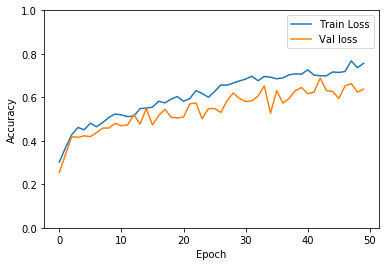

In [0]:

#Plotting graph for accuracy 

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 1])

plot_history(model1_history)

##Step 4.3: Building Fine tuning model


In [0]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
# Freeze the layers except the last 4 layers

for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers

for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f1cbe0dcd68> False
<keras.layers.convolutional.Conv2D object at 0x7f1cbe0dcda0> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fe70438> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1c6fe873c8> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fe70c50> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fe31198> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1c6fe31a20> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fe4a080> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fde4240> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fdf4a90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1c6fe0cf60> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fda56d8> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fdd03c8> False
<keras.layers.convolutional.Conv2D object at 0x7f1c6fdd0c88> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1c6fd82d30>

In [0]:
# create a data generator
  
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# load and iterate training dataset
 
train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/assignment2_data/training1',                                                  
                                                    target_size=(32,32),
                                                    batch_size=64,
                                                    class_mode='categorical')
 
# load and iterate validation dataset

validation_generator = validation_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/assignment2_data/testing1',
                                                              target_size=(32,32),
                                                              batch_size=64,
                                                              class_mode='categorical',
                                                              shuffle=False)

Found 921 images belonging to 30 classes.
Found 279 images belonging to 30 classes.


In [0]:
# Create the fine tuning model
fine_tuning_model = models.Sequential()
 
# Add the vgg convolutional base model
fine_tuning_model.add(vgg_conv)
 
# Add new layers
fine_tuning_model.add(layers.Flatten())
fine_tuning_model.add(layers.Dense(1024, activation='relu'))
fine_tuning_model.add(layers.Dropout(0.5))
fine_tuning_model.add(layers.Dense(30, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
fine_tuning_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 30)                30750     
Total params: 15,270,750
Trainable params: 7,635,486
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
X_val_sample, val_labels = next(train_generator)
print(val_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
# Compile the fine tuning model

fine_tuning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Fitting Fine tuning model

In [0]:
# Train the fine tuning model

fine_tuning_model_history = fine_tuning_model.fit_generator(train_generator,
                                                            steps_per_epoch=train_generator.samples/train_generator.batch_size ,
                                                            epochs=30,
                                                            validation_data=validation_generator,
                                                            validation_steps=validation_generator.samples/validation_generator.batch_size,
                                                            verbose=1)
 
# Save the model
fine_tuning_model.save('small_last4.h5')

Epoch 1/30
15/14 [===============================] - 78s 5s/step - loss: 1.7231 - acc: 0.4759 - val_loss: 1.7018 - val_acc: 0.4767
Epoch 2/30
15/14 [===============================] - 65s 4s/step - loss: 1.8064 - acc: 0.4798 - val_loss: 1.3367 - val_acc: 0.6129
Epoch 3/30
15/14 [===============================] - 66s 4s/step - loss: 1.7179 - acc: 0.4967 - val_loss: 1.4280 - val_acc: 0.5591
Epoch 4/30
15/14 [===============================] - 65s 4s/step - loss: 1.6903 - acc: 0.5144 - val_loss: 1.4946 - val_acc: 0.5233
Epoch 5/30
15/14 [===============================] - 65s 4s/step - loss: 1.8362 - acc: 0.4707 - val_loss: 1.5905 - val_acc: 0.5305
Epoch 6/30
15/14 [===============================] - 66s 4s/step - loss: 1.6347 - acc: 0.4966 - val_loss: 1.5460 - val_acc: 0.5412
Epoch 7/30
15/14 [===============================] - 66s 4s/step - loss: 1.6742 - acc: 0.5040 - val_loss: 1.8323 - val_acc: 0.4839
Epoch 8/30
15/14 [===============================] - 66s 4s/step - loss: 1.8371 - a

## Plotting graph for fine tuning model

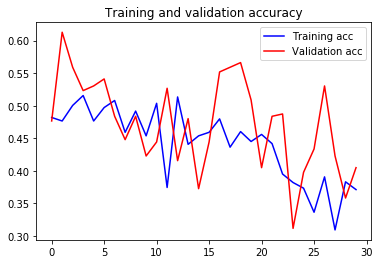

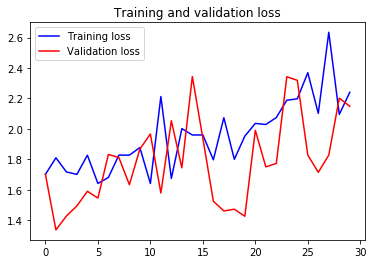

In [0]:
acc = fine_tuning_model_history.history['acc']
val_acc = fine_tuning_model_history.history['val_acc']
loss = fine_tuning_model_history.history['loss']
val_loss = fine_tuning_model_history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

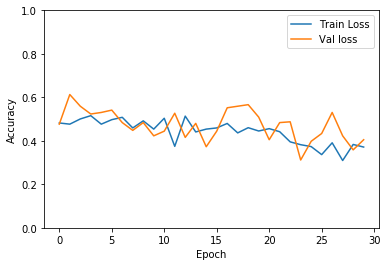

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 1])

plot_history(fine_tuning_model_history)

## Analysis of all models (Model Comparison Assignment 2)

- From above models, we can see that, we are getting accuracy of 23.25%  with baseline model. 

- After building and fitting CNN model and fine tuning model, we are getting accuracy more than baseline model for all models which is upto 68% and 53% respectively.